# The old three sigma

Allen Downey 2019

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf

from utils import decorate

In [2]:
# https://finance.yahoo.com/quote/%5EDJI/history?period1=475822800&period2=1565150400&interval=1d&filter=history&frequency=1d

#df = pd.read_csv('yahoo/yahoo_djia.csv')
#df.shape

(8701, 7)

In [3]:
# https://finance.yahoo.com/quote/%5EGSPC/history?period1=-630961200&period2=1565150400&interval=1d&filter=history&frequency=1d

df = pd.read_csv('yahoo/yahoo_sp500.csv')
df.shape

(17511, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [7]:
change = df['Open'].diff() / df['Open'] * 100
change = change.dropna()
change.shape

(17510,)

In [8]:
from empiricaldist import Cdf

cdf = Cdf.from_seq(change)

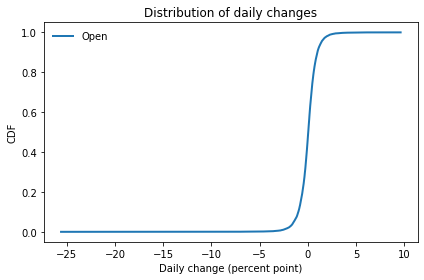

In [9]:
cdf.plot()
decorate(xlabel='Daily change (percent point)',
         ylabel='CDF',
         title='Distribution of daily changes')

In [10]:
from scipy.stats import norm

def make_model(sample, size=201):
    mu = np.mean(sample)
    sigma = np.std(sample)
    model = norm(mu, sigma)

    xs = np.linspace(np.min(sample), np.max(sample), size)
    ys = model.cdf(xs)
    return xs, ys

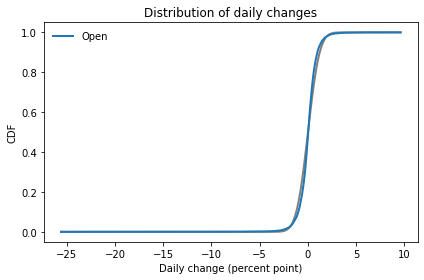

In [11]:
xs, ys = make_model(change)

plt.plot(xs, ys, color='gray')
cdf.plot()
decorate(xlabel='Daily change (percent point)',
         ylabel='CDF',
         title='Distribution of daily changes')

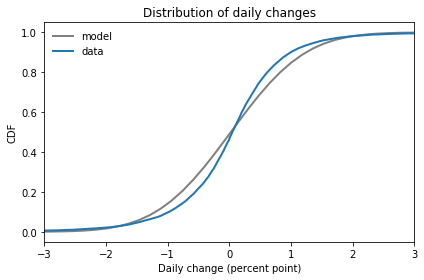

In [12]:
plt.plot(xs, ys, color='gray', label='model')
cdf.plot(label='data')
decorate(xlim=[-3, 3],
         xlabel='Daily change (percent point)',
         ylabel='CDF',
         title='Distribution of daily changes')

In [15]:
from empiricaldist import Surv

def tail_plot(sample):
    xs, ys = make_model(sample)
    plt.plot(xs, 1-ys, color='gray', label='model')

    surv = Surv.from_seq(sample)
    surv.replace(0, np.nan, inplace=True)
    surv.plot(label='data')

    decorate(xscale='log', 
             yscale='log', 
             xlabel='Daily change (log percent point)',
             ylabel='CCDF (log)')

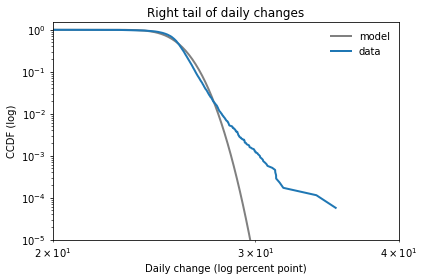

In [16]:
right_tail = change - np.min(change)
tail_plot(right_tail)

decorate(title='Right tail of daily changes',
         xlim=[20, 40],
         ylim=[1e-5, 1.5])

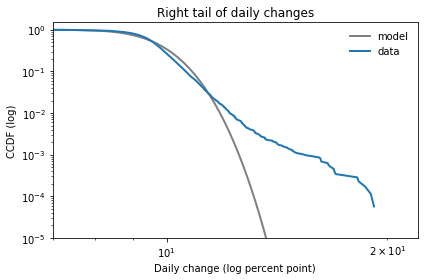

In [17]:
left_tail = np.max(change) - change
tail_plot(left_tail)

decorate(title='Right tail of daily changes', 
         xlim=[7, 22],
         ylim=[1e-5, 1.5])

In [18]:
pd.Series(left_tail).describe()

count    17510.000000
mean         9.617362
std          0.950662
min          0.000000
25%          9.154142
50%          9.592723
75%         10.045265
max         35.253218
Name: Open, dtype: float64

In [19]:
pd.Series(right_tail).describe()

count    17510.000000
mean        25.635856
std          0.950662
min          0.000000
25%         25.207953
50%         25.660494
75%         26.099076
max         35.253218
Name: Open, dtype: float64